In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline


In [2]:
#implementation of sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s 

In [3]:
#initialse the model parameters
def initialise_with_zeros(m):
    w = np.zeros((m,1))
    b = 0
    return w,b
#here w is a m dimenion array with m columns and 1 row 


In [4]:
# example of using .zeros() function with numpy
import numpy as np
m = 7
w = np.zeros((m,1))
print(w)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [5]:
def propagate(w , b, X, Y):
    m = X.shape[1]
    # forward propagation
    A = sigmoid(np.dot(w.T, X)+ b) # compute activation
    cost = -(1/m)*(np.sum((Y*np.log(A)) + (1-Y) *np.log(1-A)))
    # backward propagation
    dw = (1/m)* np.dot(X, ((A-Y).T))
    db = (1/m) * np.sum(A-Y)
    grads = {"dw": dw, "db": db}
    return grads, cost

In [7]:
def predict(w, b, X):
    # Arguments:
 #w — weights, a numpy array of size (num_px * num_px * 3, 1)
 #b — bias, a scalar
 #X — data of size (num_px * num_px * 3, number of examples)
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
     # Convert probabilities A[0,i] to actual predictions p[0,i]
         Y_prediction[0,i] = 1 if A[0, i] > 0.5 else 0
    pass
    return Y_prediction
 


In [8]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, cost = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs, "Y_prediction_test": Y_prediction_test, "Y_prediction_train": Y_prediction_train, "w": w, "b": b, "learning_rate": learning_rate, "num_iterations": num_iterations}
    return d


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Implementation of sigmoid function
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s 

# Initialize the model parameters
def initialize_with_zeros(m):
    w = np.zeros((m, 1))
    b = 0
    return w, b

# Forward and Backward Propagation
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1/m) * np.sum((Y * np.log(A)) + (1 - Y) * np.log(1 - A))
    
    # Backward propagation
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

# Predict function
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions Y_prediction[0,i]
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_prediction

# Model function
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X_train, Y_train)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
    
    # Training and test set predictions
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    # Print train/test accuracy
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    print("Train accuracy: {} %".format(train_accuracy))
    print("Test accuracy: {} %".format(test_accuracy))
    
    d = {"w": w, "b": b, "Y_prediction_train": Y_prediction_train, "Y_prediction_test": Y_prediction_test, "cost": cost, "learning_rate": learning_rate, "num_iterations": num_iterations}

    
    return d

In [10]:
# Generate random training data
np.random.seed(42)
X_train = np.random.randn(3, 80)
Y_train = np.random.randint(0, 2, (1, 80))

# Generate random test data
X_test = np.random.randn(3, 20)
Y_test = np.random.randint(0, 2, (1, 20))

# Run the model
result = model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=True)




Cost after iteration 0: 0.6931471805599454
Cost after iteration 100: 0.6545032093835844
Cost after iteration 200: 0.654503209095601
Cost after iteration 300: 0.654503209095601
Cost after iteration 400: 0.654503209095601
Cost after iteration 500: 0.654503209095601
Cost after iteration 600: 0.654503209095601
Cost after iteration 700: 0.654503209095601
Cost after iteration 800: 0.654503209095601
Cost after iteration 900: 0.654503209095601
Cost after iteration 1000: 0.654503209095601
Cost after iteration 1100: 0.654503209095601
Cost after iteration 1200: 0.654503209095601
Cost after iteration 1300: 0.654503209095601
Cost after iteration 1400: 0.654503209095601
Cost after iteration 1500: 0.654503209095601
Cost after iteration 1600: 0.654503209095601
Cost after iteration 1700: 0.654503209095601
Cost after iteration 1800: 0.654503209095601
Cost after iteration 1900: 0.654503209095601
Train accuracy: 56.25 %
Test accuracy: 55.0 %


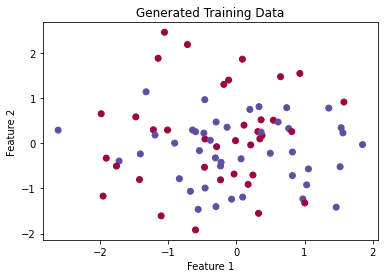

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random training data
np.random.seed(42)
X_train = np.random.randn(3, 80)  # 3 features, 80 examples
Y_train = np.random.randint(0, 2, (1, 80))  # Binary labels (0 or 1), 80 examples

# Visualize the generated data
plt.scatter(X_train[0, :], X_train[1, :], c=Y_train, cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Training Data')
plt.show()